In [ ]:
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import re
from functools import partial
from scipy.stats import mode
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, PowerTransformer, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, cohen_kappa_score, log_loss, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.isotonic import IsotonicRegression
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
#import optuna
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
#from deap import base, creator, tools, algorithms
import random
import xgboost as xgb

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00


In [ ]:
pip install xgboost scikit-learn deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving cirrhosis.csv to cirrhosis.csv


In [ ]:
from google.colab import files
uploaded2 = files.upload()


Saving test- Cirrhosis Outcomes.csv to test- Cirrhosis Outcomes.csv


In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving train-Cirrhosis Outcomes.csv to train-Cirrhosis Outcomes.csv


In [ ]:
original = pd.read_csv('cirrhosis.csv')
train = pd.read_csv('train-Cirrhosis Outcomes.csv')
test = pd.read_csv('test- Cirrhosis Outcomes.csv')

In [ ]:
attributes = ['ID','N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
              'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
              'Prothrombin','Stage']
min_max_values = {attr: {'min': original[attr].min(), 'max': original[attr].max()} for attr in attributes}
min_max_df = pd.DataFrame(min_max_values).T
t
print(min_max_df)

NameError: name 't' is not defined

In [ ]:
X = train.drop(columns=['Status'])  # Features
Y = train['Status']  # Target variable
# Convert the categorical target labels ['C', 'CL', 'D'] into numerical values [0, 1, 2]
Y = Y.map({'C': 0, 'CL': 1, 'D': 2})
X['Edema'] = X['Edema'].map({'N': 0, 'Y': 1, 'S': 1})
X['Drug'] = X['Drug'].map({'D-penicillamine': 0, 'Placebo': 1})
X['Sex'] = X['Sex'].map({'F': 0, 'M': 1})
X['Ascites'] = X['Ascites'].map({'N': 0, 'Y': 1})
X['Hepatomegaly'] = X['Hepatomegaly'].map({'N': 0, 'Y': 1})
X['Spiders'] = X['Spiders'].map({'N': 0, 'Y': 1})
X = pd.concat([X, pd.get_dummies(train['Edema'], drop_first = True, dtype = int)], axis = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to search for the best hyperparameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

# Print the best parameters
print(f"Best Parameters: {rf_random.best_params_}")

# Use the best estimator for predictions
best_rf = rf_random.best_estimator_
Y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


ValueError: 
All the 300 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
58 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'D-penicillamine'

--------------------------------------------------------------------------------
116 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Placebo'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load data
train = pd.read_csv('train-Cirrhosis Outcomes.csv')

# Separate features and target variable
X = train.drop(columns=['Status'])
Y = train['Status'].map({'C': 0, 'CL': 1, 'D': 2})

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model with the pipeline
pipeline.fit(X_train, Y_train)

# Predict on the test set
Y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy with preprocessed data: {accuracy}")


Accuracy with preprocessed data: 0.8336495888678052


In [ ]:
train.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status',
       'generated'],
      dtype='object')

In [ ]:
test.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage',
       'generated'],
      dtype='object')

In [ ]:
# Concatenate train and original datasets
train = pd.concat([train, original], axis=0).reset_index(drop=True)

# Feature Engineering
X = train.drop(columns=['Edema', 'Status'], axis=1)
X['Drug'] = X['Drug'].map({'D-penicillamine': 0, 'Placebo': 1})
X['Sex'] = X['Sex'].map({'F': 0, 'M': 1})
X['Ascites'] = X['Ascites'].map({'N': 0, 'Y': 1})
X['Hepatomegaly'] = X['Hepatomegaly'].map({'N': 0, 'Y': 1})
X['Spiders'] = X['Spiders'].map({'N': 0, 'Y': 1})
X = pd.concat([X, pd.get_dummies(train['Edema'], drop_first=True, dtype=int)], axis=1)

Y = train['Status'].map({'C': 0, 'CL': 1, 'D': 2})

# Adding interaction features
X['bilirubin_albumin_ratio'] = X['Bilirubin'] / (X['Albumin'] + 1e-5)
X['age_ascites_interaction'] = X['Age'] * X['Ascites']

# Preparing test set similarly
test_md = test.drop(columns=['Edema'], axis=1)
test_md['Drug'] = test_md['Drug'].map({'D-penicillamine': 0, 'Placebo': 1})
test_md['Sex'] = test_md['Sex'].map({'F': 0, 'M': 1})
test_md['Ascites'] = test_md['Ascites'].map({'N': 0, 'Y': 1})
test_md['Hepatomegaly'] = test_md['Hepatomegaly'].map({'N': 0, 'Y': 1})
test_md['Spiders'] = test_md['Spiders'].map({'N': 0, 'Y': 1})
test_md = pd.concat([test_md, pd.get_dummies(test['Edema'], drop_first=True, dtype=int)], axis=1)
test_md['bilirubin_albumin_ratio'] = test_md['Bilirubin'] / (test_md['Albumin'] + 1e-5)
test_md['age_ascites_interaction'] = test_md['Age'] * test_md['Ascites']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search
grid_search.fit(X, Y)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Train and evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X, Y)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


KeyboardInterrupt: 

In [ ]:
# Adding interaction features
X['bilirubin_albumin_ratio'] = X['Bilirubin'] / (X['Albumin'] + 1e-5)
X['age_ascites_interaction'] = X['Age'] * X['Ascites']

# Add these features to the test set as well
test_md['bilirubin_albumin_ratio'] = test_md['Bilirubin'] / (test_md['Albumin'] + 1e-5)
test_md['age_ascites_interaction'] = test_md['Age'] * test_md['Ascites']


In [ ]:
# Fit the Random Forest model
rf.fit(X, Y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top N features
top_features = feature_importance_df['Feature'].values[:10]

# Reduce the dataset to top features
X_reduced = X[top_features]
test_md_reduced = test_md[top_features]


In [ ]:
continuous_features = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
for feature in continuous_features:
    # Create bins and add as new columns with "_binned" suffix
    X[f"{feature}_binned"] = pd.cut(X[feature], bins=4, labels=False)

# Optional: Drop the original continuous features if you only want to use the binned data
# X = X.drop(columns=continuous_features)

# Include dummy variables for categorical features
X = pd.concat([X, pd.get_dummies(X['Edema'], drop_first=True, dtype=int)], axis=1)

X.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,S,Y,Bilirubin_binned,Cholesterol_binned,Albumin_binned,Copper_binned,Alk_Phos_binned,SGOT_binned,Tryglicerides_binned,Platelets_binned,Prothrombin_binned,1,1
0,0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,0,0,0,0,2,1,0,1,0,2,0,0,0
1,1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0,0,0,0,2,0,0,1,0,2,0,0,0
2,2,3428,1,13727,0,0,1,1,1,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,0,1,0,0,2,0,0,0,0,1,1,1,1
3,3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0,0,0,0,2,0,0,0,0,1,0,0,0
4,4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0,0,0,0,2,0,0,0,0,1,0,0,0


In [ ]:
print("Checking for NaN values in selected columns:")
print(X.isnull().sum())

Checking for NaN values in selected columns:
id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
S                0
Y                0
dtype: int64


In [ ]:
# Split the training data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
train.shape

(7905, 20)

In [ ]:
test.shape

(5271, 19)

In [ ]:
original.shape

(418, 20)

In [ ]:
#target- Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis.
#The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).

In [ ]:
train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [ ]:
train.head(3)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,generated
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,1
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,1
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,1


In [ ]:
test.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000
mean,10540.000000,2038.696642,18497.756782,2.600389,352.486435,3.538071,84.701679,1811.233314,113.587526,115.286094,264.023715,10.632865,3.036995
std,1521.750965,1086.843490,3583.898801,3.852395,200.438989,0.354886,77.542064,1935.351492,48.964789,52.602780,87.584068,0.792711,0.856030
min,7905.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,9222.500000,1234.000000,15730.000000,0.700000,248.000000,3.350000,39.000000,823.000000,75.000000,84.000000,209.000000,10.000000,2.000000
50%,10540.000000,1882.000000,18806.000000,1.100000,299.000000,3.570000,65.000000,1142.000000,106.950000,104.000000,259.000000,10.600000,3.000000
75%,11857.500000,2692.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1838.500000,137.950000,138.000000,317.000000,11.000000,4.000000
max,13175.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,15.200000,4.000000


In [ ]:
#Data Exploration

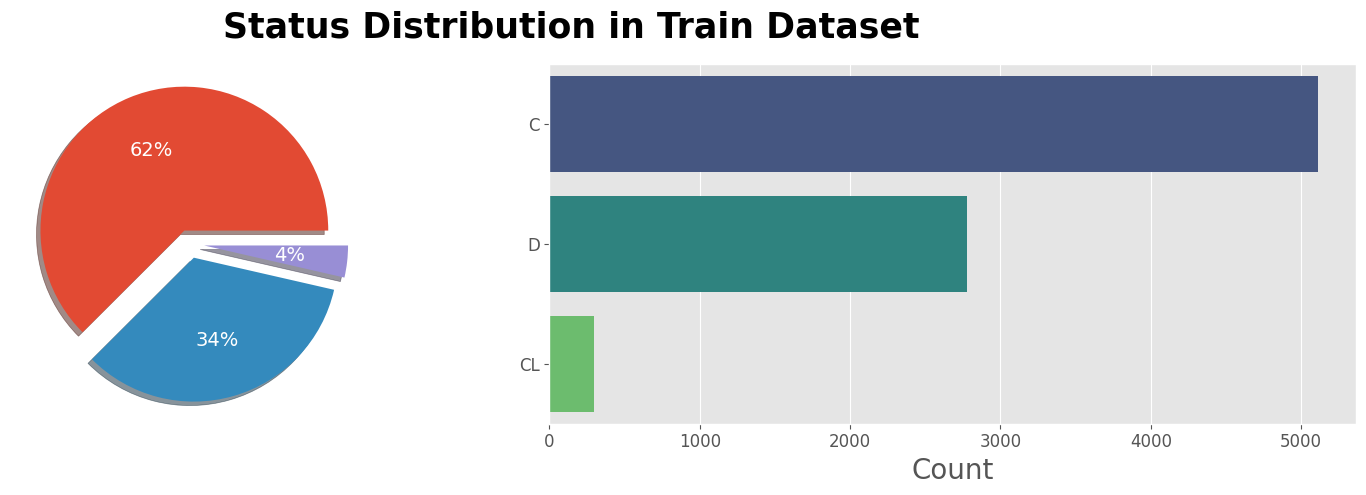

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected plot code
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

ax[0].pie(
    train['Status'].value_counts(),  # Pie chart for 'Status' counts
    shadow=True,
    explode=[.1 for _ in range(train.Status.nunique())],  # Explode each slice equally
    autopct='%1.f%%',  # Percentage format
    textprops={'size': 14, 'color': 'white'}  # Text size and color for pie chart
)

# Countplot for 'Status' in the training dataset
sns.countplot(data=train, y='Status', ax=ax[1], palette='viridis', order=train['Status'].value_counts().index)

# Customize labels and fonts for the countplot
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize=12)
ax[1].set_xlabel('Count', fontsize=20)
ax[1].set_ylabel(None)  # Remove the Y label
plt.xticks(fontsize=12)

# Title and layout adjustments
fig.suptitle('Status Distribution in Train Dataset', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
#it is clear that the dataset is imbalanced.

In [ ]:
train = train.drop(columns = 'id', axis = 1)
train['generated'] = 1

test = test.drop(columns = 'id', axis = 1)
test['generated'] = 1

original = original.drop(columns = 'ID', axis = 1)
original = original.dropna()
original['generated'] = 0

train = pd.concat([train, original], axis = 0).reset_index(drop = True)

X = train.drop(columns = ['Edema', 'Status'], axis = 1)
X['Drug'] = X['Drug'].map({'D-penicillamine': 0, 'Placebo': 1})
X['Sex'] = X['Sex'].map({'F': 0, 'M': 1})
X['Ascites'] = X['Ascites'].map({'N': 0, 'Y': 1})
X['Hepatomegaly'] = X['Hepatomegaly'].map({'N': 0, 'Y': 1})
X['Spiders'] = X['Spiders'].map({'N': 0, 'Y': 1})
X = pd.concat([X, pd.get_dummies(train['Edema'], drop_first = True, dtype = int)], axis = 1)

Y = train['Status'].map({'C': 0, 'CL': 1, 'D': 2})


In [ ]:
#feature engineering

test_md = test.drop(columns = ['Edema'], axis = 1)
test_md['Drug'] = test_md['Drug'].map({'D-penicillamine': 0, 'Placebo': 1})
test_md['Sex'] = test_md['Sex'].map({'F': 0, 'M': 1})
test_md['Ascites'] = test_md['Ascites'].map({'N': 0, 'Y': 1})
test_md['Hepatomegaly'] = test_md['Hepatomegaly'].map({'N': 0, 'Y': 1})
test_md['Spiders'] = test_md['Spiders'].map({'N': 0, 'Y': 1})
test_md = pd.concat([test_md, pd.get_dummies(test['Edema'], drop_first = True, dtype = int)], axis = 1)

skf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [ ]:
#LogistiRegression

In [ ]:
%%time
logit_cv = cross_val_score(make_pipeline(PowerTransformer(), LogisticRegression(multi_class = 'ovr',
                                                                                max_iter = 1000)),
                           X,
                           Y,
                           scoring = 'neg_log_loss',
                           cv = skf,
                           n_jobs = -1)

print(f"The 10-folds oof Log-Loss score is {-1*logit_cv.mean()}")

The 10-folds oof Log-Loss score is 0.5126985886410547
CPU times: user 98.2 ms, sys: 60.1 ms, total: 158 ms
Wall time: 3.45 s


In [ ]:
#RandomForestClassifier model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid_md2 = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
}

# Perform GridSearchCV
grid_md2 = GridSearchCV(RandomForestClassifier(random_state=1, n_jobs=-1), param_grid_md2, cv=5, scoring='accuracy', n_jobs=-1)
grid_md2.fit(X_train, Y_train)

# Best parameters and accuracy
print("Best parameters for md2:", grid_md2.best_params_)
print("Best accuracy for md2:", grid_md2.best_score_)


Best parameters for md2: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best accuracy for md2: 0.8244776604793115


In [ ]:
%%time
RF_cv = cross_val_score(RandomForestClassifier(**{'n_estimators': 1000,
                                                  'criterion': 'log_loss',
                                                  'max_depth': 14,
                                                  'min_samples_split': 3,
                                                  'min_samples_leaf': 1,
                                                  'max_features': 4,
                                                  'random_state': 1,
                                                  'n_jobs': -1}),
                        X,
                        Y,
                        scoring = 'neg_log_loss',
                        cv = skf,
                        n_jobs = -1)

print(f"The 10-folds oof Log-Loss score of the RF is {-1*RF_cv.mean()}")


The 10-folds oof Log-Loss score of the RF is 0.4473870145671122
CPU times: user 849 ms, sys: 190 ms, total: 1.04 s
Wall time: 2min 30s


In [ ]:
#HistGradientBoostingClassifier

In [ ]:
%%time
HB_cv = cross_val_score(HistGradientBoostingClassifier(**{'l2_regularization': 8.876168706639714,
                                                          'early_stopping': False,
                                                          'learning_rate': 0.009956485590638034,
                                                          'max_iter': 500,
                                                          'max_depth': 16,
                                                          'max_bins': 255,
                                                          'min_samples_leaf': 16,
                                                          'max_leaf_nodes': 18,
                                                          'random_state': 3}),
                        X,
                        Y,
                        scoring = 'neg_log_loss',
                        cv = skf,
                        n_jobs = -1)

print(f"The average 10-folds oof Log-Loss score of the HG is {-1*HB_cv.mean()}")


The average 10-folds oof Log-Loss score of the HG is 0.43825783048502276
CPU times: user 290 ms, sys: 56.9 ms, total: 347 ms
Wall time: 42.9 s


In [ ]:
#LGBMClassifier model.

In [ ]:
%%time
LGBM_cv = cross_val_score(LGBMClassifier(**{'n_estimators': 1000,
                                            'learning_rate': 0.013657589160895923,
                                            'max_depth': 17,
                                            'reg_alpha': 1.9791969860931342,
                                            'reg_lambda': 1.2857088172765347,
                                            'num_leaves': 37,
                                            'subsample': 0.6351453342675659,
                                            'colsample_bytree': 0.2644509924064132}),
                          X,
                          Y,
                          scoring = 'neg_log_loss',
                          cv = skf,
                          n_jobs = -1)

print(f"The average 10-folds oof Log-Loss score of the LGBM model is {-1*LGBM_cv.mean()}")

In [ ]:
#XGBClassifer

In [ ]:
%%time
XGB_cv = cross_val_score(XGBClassifier(**{'max_depth': 7,
                                          'learning_rate': 0.03570188608151033,
                                          'n_estimators': 1000,
                                          'gamma': 0.6440001307764849,
                                          'min_child_weight': 2,
                                          'colsample_bytree': 0.27034458854562116,
                                          'subsample': 0.8435412915999765}),
                          X,
                          Y,
                          scoring = 'neg_log_loss',
                          cv = skf,
                          n_jobs = -1)

print(f"The average 10-folds oof Log-Loss score of the XGBoost model is {-1*XGB_cv.mean()}")

The average 10-folds oof Log-Loss score of the XGBoost model is 0.41903614828336366


In [ ]:
#CatBoostClassifer model.

In [ ]:
%%time
Cat_cv = cross_val_score(CatBoostClassifier(loss_function = 'MultiClass',
                                            iterations = 2000,
                                            learning_rate = 0.01,
                                            depth = 8,
                                            verbose = False,
                                            task_type = 'CPU'),
                          X,
                          Y,
                          scoring = 'neg_log_loss',
                          cv = skf,
                          n_jobs = -1)

print(f"The average 10-folds oof Log-Loss score of the CatBoost model is {-1*Cat_cv.mean()}")


The average 10-folds oof Log-Loss score of the CatBoost model is 0.441892338533313


In [ ]:
#ExtraTreesClassifier mode

In [ ]:
%%time
ET_cv = cross_val_score(ExtraTreesClassifier(criterion = 'log_loss',
                                             n_estimators = 500,
                                             min_samples_leaf = 3,
                                             max_depth = 15,
                                             random_state = 2),
                        X,
                        Y,
                        scoring = 'neg_log_loss',
                        cv = skf,
                        n_jobs = -1)

print(f"The 10-folds oof Log-Loss score of the ET is {-1*ET_cv.mean()}")

The 10-folds oof Log-Loss score of the ET is 0.49305652728810506


In [ ]:
model_performance = pd.DataFrame()
model_performance['Model'] = ['Logistic', 'RF', 'ET', 'Hist', 'LGBM', 'XGBoost', 'CatBoost']
model_performance['10-folds oof Log-Loss'] = [-1*logit_cv.mean(), -1*RF_cv.mean(), -1*ET_cv.mean(), -1*HB_cv.mean(), -1*LGBM_cv.mean(), -1*XGB_cv.mean(), -1*Cat_cv.mean()]
print(f"The followig table shows the performance of the considered models: \n\n{model_performance}")

The followig table shows the performance of the considered models: 

      Model  10-folds oof Log-Loss
0  Logistic               0.512699
1        RF               0.447387
2        ET               0.493057
3      Hist               0.438258
4      LGBM               0.418989
5   XGBoost               0.419036
6  CatBoost               0.441892


In [ ]:
md1 = make_pipeline(PowerTransformer(), LogisticRegression(multi_class = 'ovr',
                                                           max_iter = 1000))

md2 = RandomForestClassifier(**{'n_estimators': 1000,
                                'criterion': 'log_loss',
                                'max_depth': 14,
                                'min_samples_split': 3,
                                'min_samples_leaf': 1,
                                'max_features': 4,
                                'random_state': 1,
                                'n_jobs': -1})

md3 = ExtraTreesClassifier(criterion = 'log_loss',
                           n_estimators = 1000,
                           min_samples_leaf = 1,
                           max_depth = 15,
                           random_state = 2)

md4 = HistGradientBoostingClassifier(**{'l2_regularization': 8.876168706639714,
                                        'early_stopping': False,
                                        'learning_rate': 0.009956485590638034,
                                        'max_iter': 500,
                                        'max_depth': 16,
                                        'max_bins': 255,
                                        'min_samples_leaf': 16,
                                        'max_leaf_nodes': 18,
                                        'random_state': 3})

'''md5 = LGBMClassifier(**{'n_estimators': 1000,
                        'learning_rate': 0.013657589160895923,
                        'max_depth': 17,
                        'reg_alpha': 1.9791969860931342,
                        'reg_lambda': 1.2857088172765347,
                        'num_leaves': 37,
                        'subsample': 0.6351453342675659,
                        'colsample_bytree': 0.2644509924064132})'''
md5 = LGBMClassifier(**{
    'objective': 'multi_logloss',
    'max_depth': 9,
    'min_child_samples': 14,
    'learning_rate': 0.034869481921747415,
    'n_estimators': 274,
    'min_child_weight': 9,
    'colsample_bytree': 0.1702910221565107,
    'reg_alpha': 0.10626128775335533,
    'reg_lambda': 0.624196407787772,
    'random_state': 42
})


'''md6 = XGBClassifier(**{'max_depth': 7,
                       'learning_rate': 0.03570188608151033,
                       'n_estimators': 1000,
                       'gamma': 0.6440001307764849,
                       'min_child_weight': 2,
                       'colsample_bytree': 0.27034458854562116,
                       'subsample': 0.8435412915999765})'''

md7 = XGBClassifier(**{
    'objective': 'multi_logloss',
    'early_stopping_rounds': 50,
    'max_depth': 9,
    'min_child_weight': 8,
    'learning_rate': 0.0337716365315986,
    'n_estimators': 733,
    'subsample': 0.6927955384688348,
    'colsample_bytree': 0.1234702658812108,
    'reg_alpha': 0.18561628377665318,
    'reg_lambda': 0.5565488299127089,
    'random_state': 42
})


md7 = CatBoostClassifier(loss_function = 'MultiClass',
                         iterations = 2000,
                         learning_rate = 0.01,
                         depth = 8,
                         verbose = False,
                         task_type = 'CPU')

In [ ]:
md4_pred, md5_pred, md6_pred = list(), list(), list()
Y_test_list = list()

for i, (train_idx, test_idx) in enumerate(skf.split(X, Y)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    md4.fit(X_train, Y_train)
    md4_pred.append(md4.predict_proba(X_test))

    md5.fit(X_train, Y_train)
    md5_pred.append(md5.predict_proba(X_test))

    md6.fit(X_train, Y_train)
    md6_pred.append(md6.predict_proba(X_test))

    Y_test_list.append(Y_test)

In [ ]:
md1_pred, md2_pred, md3_pred,md7_pred = list(), list(), list(),list()
Y_test_list = list()

for i, (train_idx, test_idx) in enumerate(skf.split(X, Y)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    md1.fit(X_train, Y_train)
    md1_pred.append(md1.predict_proba(X_test))

    md2.fit(X_train, Y_train)
    md2_pred.append(md2.predict_proba(X_test))

    md3.fit(X_train, Y_train)
    md3_pred.append(md3.predict_proba(X_test))

    md7.fit(X_train, Y_train)
    md7_pred.append(md7.predict_proba(X_test))

    Y_test_list.append(Y_test)

In [ ]:
md4_fit = md4.fit(X, Y)
md5_fit = md5.fit(X, Y)
md6_fit = md6.fit(X, Y)
md1_fit = md1.fit(X, Y)
md2_fit = md2.fit(X, Y)
md3_fit = md3.fit(X, Y)
md7_fit = md7.fit(X, Y)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Concatenate predictions from all folds
md4_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md4_pred], axis=0)
md5_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md5_pred], axis=0)
md6_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md6_pred], axis=0)
md1_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md1_pred], axis=0)
md2_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md2_pred], axis=0)
md3_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md3_pred], axis=0)
md7_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md7_pred], axis=0)

# Concatenate all true labels from all folds
Y_test_all = np.concatenate(Y_test_list, axis=0)

# Calculate accuracy for each model
md4_accuracy = accuracy_score(Y_test_all, md4_all_preds)
md5_accuracy = accuracy_score(Y_test_all, md5_all_preds)
md6_accuracy = accuracy_score(Y_test_all, md6_all_preds)
md1_accuracy = accuracy_score(Y_test_all, md1_all_preds)
md2_accuracy = accuracy_score(Y_test_all, md2_all_preds)
md3_accuracy = accuracy_score(Y_test_all, md3_all_preds)
md7_accuracy = accuracy_score(Y_test_all, md7_all_preds)

# Print accuracies
print(f"md4 Accuracy: {md4_accuracy}")
print(f"md5 Accuracy: {md5_accuracy}")
print(f"md6 Accuracy: {md6_accuracy}")
print(f"md1 Accuracy: {md1_accuracy}")
print(f"md2 Accuracy: {md2_accuracy}")
print(f"md3 Accuracy: {md3_accuracy}")
print(f"md7 Accuracy: {md7_accuracy}")


md4 Accuracy: 0.832049871653832
md5 Accuracy: 0.8391394695025058
md6 Accuracy: 0.8410952206331744
md1 Accuracy: 0.8061361691724728
md2 Accuracy: 0.8316831683168316
md3 Accuracy: 0.8200708959784867
md7 Accuracy: 0.830338589414497


In [ ]:
md4 Accuracy: 0.832049871653832
md5 Accuracy: 0.8391394695025058
md6 Accuracy: 0.8410952206331744
md1 Accuracy: 0.8061361691724728
md2 Accuracy: 0.8316831683168316
md3 Accuracy: 0.8200708959784867
md7 Accuracy: 0.830338589414497

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
m8 = make_pipeline(PowerTransformer(), KNeighborsClassifier())

m8_pred = list()

for i, (train_idx, test_idx) in enumerate(skf.split(X, Y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    m8.fit(X_train, Y_train)
    m8_pred.append(m8.predict_proba(X_test))

    Y_test_list.append(Y_test)

m8_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in m8_pred], axis=0)
m8_accuracy = accuracy_score(Y_test_all, m8_all_preds)
print(f"m8 (KNN) Accuracy: {m8_accuracy}")


m8 (KNN) Accuracy: 0.7869453612027869


In [ ]:
m8_pred = list()
Y_test_list = list()

for i, (train_idx, test_idx) in enumerate(skf.split(X, Y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    m8.fit(X_train, Y_train)
    m8_pred.append(m8.predict_proba(X_test))

    Y_test_list.append(Y_test)

# Concatenate predictions from all folds for m8
m8_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in m8_pred], axis=0)

# Concatenate all true labels from all folds
Y_test_all = np.concatenate(Y_test_list, axis=0)

In [ ]:
calculate_metrics(Y_test_all, m8_all_preds, "m8")

m8 F1-score: 0.7734890664420375
m8 Recall: 0.7869453612027869
m8 Precision: 0.7720273308747598



In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

md4_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md4_pred], axis=0)
md5_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md5_pred], axis=0)
md6_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md6_pred], axis=0)
md1_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md1_pred], axis=0)
md2_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md2_pred], axis=0)
md3_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md3_pred], axis=0)
md7_all_preds = np.concatenate([np.argmax(pred, axis=1) for pred in md7_pred], axis=0)

Y_test_all = np.concatenate(Y_test_list, axis=0)

def calculate_metrics(y_true, y_pred, model_name):
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')

    print(f"{model_name} F1-score: {f1}")
    print(f"{model_name} Recall: {recall}")
    print(f"{model_name} Precision: {precision}")
    print("")

calculate_metrics(Y_test_all, md4_all_preds, "md4")
calculate_metrics(Y_test_all, md5_all_preds, "md5")
calculate_metrics(Y_test_all, md6_all_preds, "md6")
calculate_metrics(Y_test_all, md1_all_preds, "md1")
calculate_metrics(Y_test_all, md2_all_preds, "md2")
calculate_metrics(Y_test_all, md3_all_preds, "md3")
calculate_metrics(Y_test_all, md7_all_preds, "md7")


md4 F1-score: 0.8240098726031462
md4 Recall: 0.832049871653832
md4 Precision: 0.8256314996997509

md5 F1-score: 0.8317561746289254
md5 Recall: 0.8391394695025058
md5 Precision: 0.8343397760940755

md6 F1-score: 0.833445658911426
md6 Recall: 0.8410952206331744
md6 Precision: 0.8370265153131826

md1 F1-score: 0.7890596093289587
md1 Recall: 0.8061361691724728
md1 Precision: 0.7750021642886584

md2 F1-score: 0.8202510942388704
md2 Recall: 0.8316831683168316
md2 Precision: 0.8305848134392914

md3 F1-score: 0.803917544823459
md3 Recall: 0.8200708959784867
md3 Precision: 0.8163798966324638

md7 F1-score: 0.8203303654346072
md7 Recall: 0.830338589414497
md7 Precision: 0.8270287554711467



In [ ]:
from sklearn.metrics import matthews_corrcoef

# Assuming md1_all_preds, md2_all_preds, etc. contain the predicted class labels for each model
md1_mcc = matthews_corrcoef(Y_test_all, md1_all_preds)
md2_mcc = matthews_corrcoef(Y_test_all, md2_all_preds)
md3_mcc = matthews_corrcoef(Y_test_all, md3_all_preds)
md4_mcc = matthews_corrcoef(Y_test_all, md4_all_preds)
md5_mcc = matthews_corrcoef(Y_test_all, md5_all_preds)
md6_mcc = matthews_corrcoef(Y_test_all, md6_all_preds)
md7_mcc = matthews_corrcoef(Y_test_all, md7_all_preds)
m8_mcc = matthews_corrcoef(Y_test_all, m8_all_preds)

# Print MCC for each model
print(f"MCC for Model 1 (md1): {md1_mcc:.4f}")
print(f"MCC for Model 2 (md2): {md2_mcc:.4f}")
print(f"MCC for Model 3 (md3): {md3_mcc:.4f}")
print(f"MCC for Model 4 (md4): {md4_mcc:.4f}")
print(f"MCC for Model 5 (md5): {md5_mcc:.4f}")
print(f"MCC for Model 6 (md6): {md6_mcc:.4f}")
print(f"MCC for Model 7 (md7): {md7_mcc:.4f}")
print(f"MCC for Model 8 (m8): {m8_mcc:.4f}")


MCC for Model 1 (md1): 0.5879
MCC for Model 2 (md2): 0.6443
MCC for Model 3 (md3): 0.6176
MCC for Model 4 (md4): 0.6475
MCC for Model 5 (md5): 0.6629
MCC for Model 6 (md6): 0.6667
MCC for Model 7 (md7): 0.6425
MCC for Model 8 (m8): 0.5468


In [ ]:
from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate and print metrics
def calculate_additional_metrics(y_true, y_pred, model_name):
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(y_true, y_pred)

    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Print metrics
    print(f"{model_name} Cohen's Kappa: {kappa:.4f}")
    print(f"{model_name} Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{model_name} Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("")

# Example calls for each model's predictions (assuming each model's predictions are stored as shown)
calculate_additional_metrics(Y_test_all, md1_all_preds, "md1")
calculate_additional_metrics(Y_test_all, md2_all_preds, "md2")
calculate_additional_metrics(Y_test_all, md3_all_preds, "md3")
calculate_additional_metrics(Y_test_all, md4_all_preds, "md4")
calculate_additional_metrics(Y_test_all, md5_all_preds, "md5")
calculate_additional_metrics(Y_test_all, md6_all_preds, "md6")
calculate_additional_metrics(Y_test_all, md7_all_preds, "md7")
calculate_additional_metrics(Y_test_all, m8_all_preds, "m8")

md1 Cohen's Kappa: 0.5831
md1 Mean Absolute Error (MAE): 0.3519
md1 Root Mean Squared Error (RMSE): 0.8173

md2 Cohen's Kappa: 0.6387
md2 Mean Absolute Error (MAE): 0.3050
md2 Root Mean Squared Error (RMSE): 0.7605

md3 Cohen's Kappa: 0.6098
md3 Mean Absolute Error (MAE): 0.3250
md3 Root Mean Squared Error (RMSE): 0.7844

md4 Cohen's Kappa: 0.6445
md4 Mean Absolute Error (MAE): 0.3031
md4 Root Mean Squared Error (RMSE): 0.7573

md5 Cohen's Kappa: 0.6602
md5 Mean Absolute Error (MAE): 0.2907
md5 Root Mean Squared Error (RMSE): 0.7418

md6 Cohen's Kappa: 0.6638
md6 Mean Absolute Error (MAE): 0.2873
md6 Root Mean Squared Error (RMSE): 0.7375

md7 Cohen's Kappa: 0.6389
md7 Mean Absolute Error (MAE): 0.3075
md7 Root Mean Squared Error (RMSE): 0.7637

m8 Cohen's Kappa: 0.5397
m8 Mean Absolute Error (MAE): 0.3871
m8 Root Mean Squared Error (RMSE): 0.8575



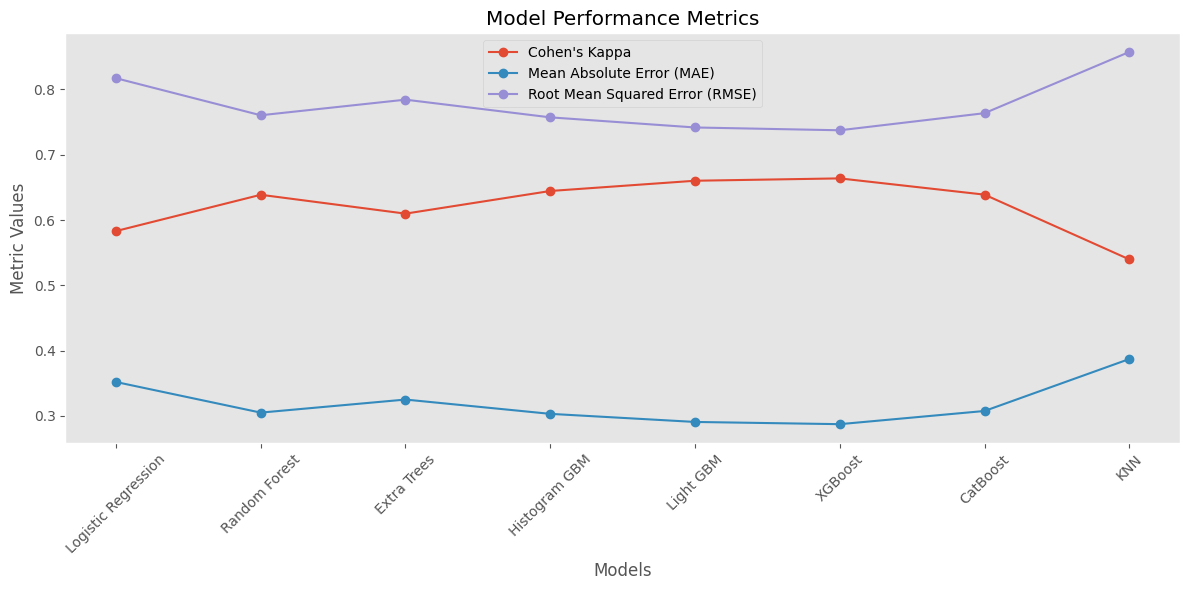

In [ ]:
import matplotlib.pyplot as plt

# Metrics data
models = [
    'Logistic Regression',
    'Random Forest',
    'Extra Trees',
    'Histogram GBM',
    'Light GBM',
    'XGBoost',
    'CatBoost',
    'KNN'
]
cohens_kappa = [0.5831, 0.6387, 0.6098, 0.6445, 0.6602, 0.6638, 0.6389, 0.5397]
mae = [0.3519, 0.3050, 0.3250, 0.3031, 0.2907, 0.2873, 0.3075, 0.3871]
rmse = [0.8173, 0.7605, 0.7844, 0.7573, 0.7418, 0.7375, 0.7637, 0.8575]

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(models, cohens_kappa, marker='o', label="Cohen's Kappa")
plt.plot(models, mae, marker='o', label='Mean Absolute Error (MAE)')
plt.plot(models, rmse, marker='o', label='Root Mean Squared Error (RMSE)')

# Add labels and title
plt.title('Model Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


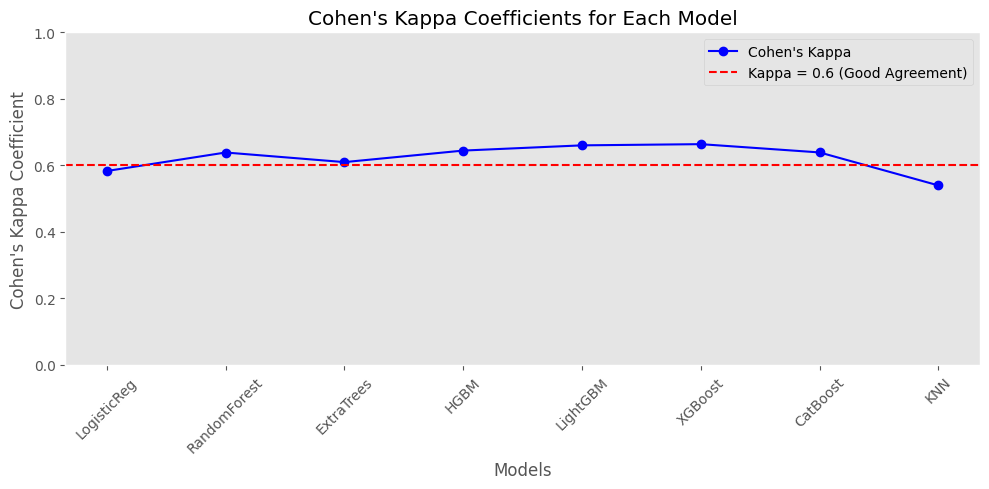

In [ ]:
models = [
    'LogisticReg',
    'RandomForest',
    'ExtraTrees',
    'HGBM',
    'LightGBM',
    'XGBoost',
    'CatBoost',
    'KNN'
]

cohens_kappa = [0.5831, 0.6387, 0.6098, 0.6445, 0.6602, 0.6638, 0.6389, 0.5397]

# Create a figure and axis
plt.figure(figsize=(10, 5))

# Plot Cohen's Kappa
plt.plot(models, cohens_kappa, marker='o', color='b', label="Cohen's Kappa")

# Add labels and title
plt.title("Cohen's Kappa Coefficients for Each Model")
plt.xlabel('Models')
plt.ylabel("Cohen's Kappa Coefficient")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] since Kappa ranges from 0 to 1
plt.axhline(y=0.6, color='r', linestyle='--', label='Kappa = 0.6 (Good Agreement)')  # Optional line for reference

# Add legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import time
from sklearn.metrics import accuracy_score
import numpy as np


def evaluate_model_with_time(model, model_name, X_train, Y_train, X_test, Y_test):

    start_train_time = time.time()
    model.fit(X_train, Y_train)
    end_train_time = time.time()

    start_predict_time = time.time()
    predictions = model.predict(X_test)
    end_predict_time = time.time()


    train_time = end_train_time - start_train_time
    predict_time = end_predict_time - start_predict_time

    accuracy = accuracy_score(Y_test, predictions)


    print(f"{model_name} Training Time: {train_time:.4f} seconds")
    print(f"{model_name} Prediction Time: {predict_time:.4f} seconds")
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("")

evaluate_model_with_time(md1, "md1", X_train, Y_train, X_test, Y_test)
evaluate_model_with_time(md2, "md2", X_train, Y_train, X_test, Y_test)
evaluate_model_with_time(md3, "md3", X_train, Y_train, X_test, Y_test)
evaluate_model_with_time(md4, "md4", X_train, Y_train, X_test, Y_test)
evaluate_model_with_time(md5, "md5", X_train, Y_train, X_test, Y_test)
evaluate_model_with_time(md6, "md6", X_train, Y_train, X_test, Y_test)
evaluate_model_with_time(md7, "md7", X_train, Y_train, X_test, Y_test)
evaluate_model_with_time(m8, "m8", X_train, Y_train, X_test, Y_test)


In [ ]:
md1 Training Time: 0.1224 seconds
md1 Prediction Time: 0.0038 seconds
md1 Accuracy: 0.7983

md2 Training Time: 11.7115 seconds
md2 Prediction Time: 0.2513 seconds
md2 Accuracy: 0.8399

md3 Training Time: 6.4106 seconds
md3 Prediction Time: 0.1747 seconds
md3 Accuracy: 0.8301

md4 Training Time: 4.5920 seconds
md4 Prediction Time: 0.1301 seconds
md4 Accuracy: 0.8325

md5 Training Time: 4.9467 seconds
md5 Prediction Time: 0.4085 seconds
md5 Accuracy: 0.8472

md6 Training Time: 4.1494 seconds
md6 Prediction Time: 0.0335 seconds
md6 Accuracy: 0.8484

md7 Training Time: 52.5788 seconds
md7 Prediction Time: 0.0086 seconds
md7 Accuracy: 0.8301

m8 Training Time: 0.1044 seconds
m8 Prediction Time: 0.0688 seconds
m8 Accuracy: 0.7946

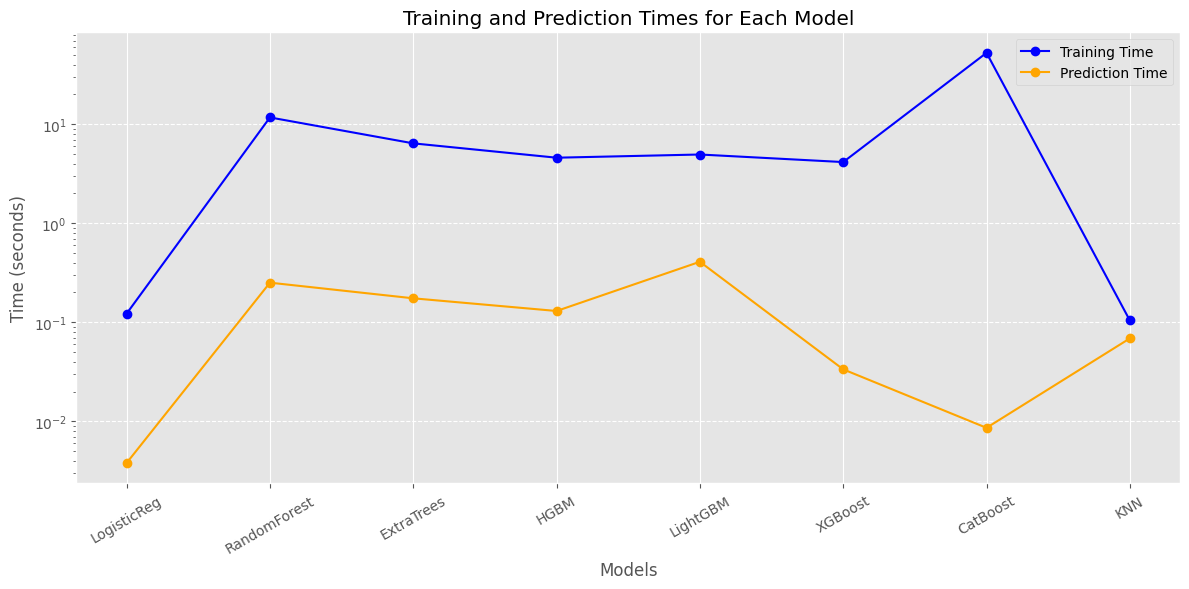

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    'LogisticReg',
    'RandomForest',
    'ExtraTrees',
    'HGBM',
    'LightGBM',
    'XGBoost',
    'CatBoost',
    'KNN'
]

# Training and prediction times (in seconds)
training_times = [0.1224, 11.7115, 6.4106, 4.5920, 4.9467, 4.1494, 52.5788, 0.1044]
prediction_times = [0.0038, 0.2513, 0.1747, 0.1301, 0.4085, 0.0335, 0.0086, 0.0688]

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plotting lines for training and prediction times
plt.plot(models, training_times, marker='o', label='Training Time', color='blue')
plt.plot(models, prediction_times, marker='o', label='Prediction Time', color='orange')

# Adding labels and title
plt.title('Training and Prediction Times for Each Model')
plt.xlabel('Models')
plt.ylabel('Time (seconds)')
plt.yscale('log')  # Use a logarithmic scale for better visualization

# Adding legend
plt.legend()

# Show grid
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.xticks(rotation=30)  # Rotate x-tick labels for better readability
plt.tight_layout()
plt.show()


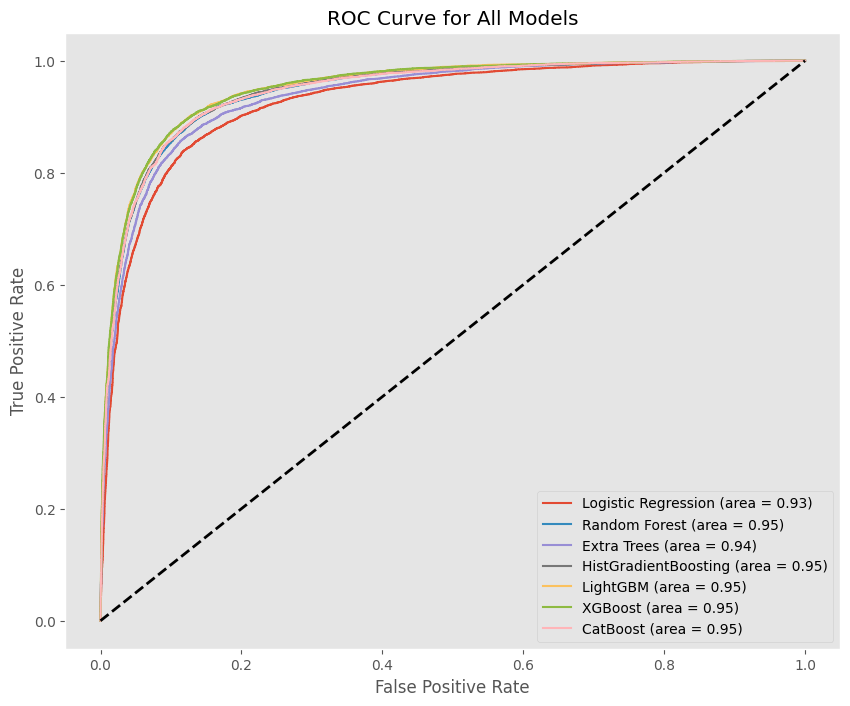

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Number of classes in the classification problem
n_classes = 3

# Concatenate all true labels from all cross-validation folds
Y_test_all = np.concatenate(Y_test_list, axis=0)

# Binarize the output labels for ROC curve plotting
Y_test_binarized = label_binarize(Y_test_all, classes=[0, 1, 2])

# Concatenate all out-of-fold predictions for each model
md1_all_probs = np.concatenate(md1_pred, axis=0)
md2_all_probs = np.concatenate(md2_pred, axis=0)
md3_all_probs = np.concatenate(md3_pred, axis=0)
md4_all_probs = np.concatenate(md4_pred, axis=0)
md5_all_probs = np.concatenate(md5_pred, axis=0)
md6_all_probs = np.concatenate(md6_pred, axis=0)
md7_all_probs = np.concatenate(md7_pred, axis=0)

models_probs = {
    'Logistic Regression': md1_all_probs,
    'Random Forest': md2_all_probs,
    'Extra Trees': md3_all_probs,
    'HistGradientBoosting': md4_all_probs,
    'LightGBM': md5_all_probs,
    'XGBoost': md6_all_probs,
    'CatBoost': md7_all_probs
}


plt.figure(figsize=(10, 8))

for model_name, y_pred_proba in models_probs.items():
    # Ensure that the number of rows matches the number of true labels
    assert y_pred_proba.shape[0] == Y_test_binarized.shape[0], f"Mismatch in samples for {model_name}"

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_binarized.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{model_name} (area = {roc_auc["micro"]:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid()

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Initialize 3x3 confusion matrices for each model (since you have 3 classes)
confusion_matrices_md1 = np.zeros((3, 3))
confusion_matrices_md2 = np.zeros((3, 3))
confusion_matrices_md3 = np.zeros((3, 3))
confusion_matrices_md7 = np.zeros((3, 3))
confusion_matrices_md4 = np.zeros((3, 3))
confusion_matrices_md5 = np.zeros((3, 3))
confusion_matrices_md6 = np.zeros((3, 3))

# Iterate through each fold (assuming 10-fold CV)
for i in range(10):
    # Get predicted labels (class with highest probability) for each model
    md1_pred_class = np.argmax(md1_pred[i], axis=1)
    md2_pred_class = np.argmax(md2_pred[i], axis=1)
    md3_pred_class = np.argmax(md3_pred[i], axis=1)
    md7_pred_class = np.argmax(md7_pred[i], axis=1)
    md4_pred_class = np.argmax(md4_pred[i], axis=1)
    md5_pred_class = np.argmax(md5_pred[i], axis=1)
    md6_pred_class = np.argmax(md6_pred[i], axis=1)

    # Compute confusion matrix for each model using labels [0, 1, 2] (3 classes)
    cm_md1 = confusion_matrix(Y_test_list[i], md1_pred_class, labels=[0, 1, 2])
    cm_md2 = confusion_matrix(Y_test_list[i], md2_pred_class, labels=[0, 1, 2])
    cm_md3 = confusion_matrix(Y_test_list[i], md3_pred_class, labels=[0, 1, 2])
    cm_md7 = confusion_matrix(Y_test_list[i], md7_pred_class, labels=[0, 1, 2])
    cm_md4 = confusion_matrix(Y_test_list[i], md4_pred_class, labels=[0, 1, 2])
    cm_md5 = confusion_matrix(Y_test_list[i], md5_pred_class, labels=[0, 1, 2])
    cm_md6 = confusion_matrix(Y_test_list[i], md6_pred_class, labels=[0, 1, 2])

    # Accumulate confusion matrices across folds
    confusion_matrices_md1 += cm_md1
    confusion_matrices_md2 += cm_md2
    confusion_matrices_md3 += cm_md3
    confusion_matrices_md7 += cm_md7
    confusion_matrices_md4 += cm_md4
    confusion_matrices_md5 += cm_md5
    confusion_matrices_md6 += cm_md6

# Output confusion matrices for each model
print("Confusion Matrix for md1 (Logistic Regression):\n", confusion_matrices_md1)
print("Confusion Matrix for md2 (Random Forest):\n", confusion_matrices_md2)
print("Confusion Matrix for md3 (Extra Trees Classifier):\n", confusion_matrices_md3)
print("Confusion Matrix for md7 (CatBoost Classifier):\n", confusion_matrices_md7)
print("Confusion Matrix for md4:\n", confusion_matrices_md4)
print("Confusion Matrix for md5:\n", confusion_matrices_md5)
print("Confusion Matrix for md6:\n", confusion_matrices_md6)

# Extract and print TP, FP, FN, TN for each class for each model
def print_metrics(conf_matrix, model_name):
    for class_idx in range(3):  # Loop through each class
        tp = conf_matrix[class_idx, class_idx]  # True Positives
        fp = np.sum(conf_matrix[:, class_idx]) - tp  # False Positives
        fn = np.sum(conf_matrix[class_idx, :]) - tp  # False Negatives
        tn = np.sum(conf_matrix) - (tp + fp + fn)  # True Negatives

        print(f"Class {class_idx} - Model {model_name}: TP={tp}, FP={fp}, FN={fn}, TN={tn}")

# Printing TP, FP, FN, TN for each model
print_metrics(confusion_matrices_md1, 'md1 (Logistic Regression)')
print_metrics(confusion_matrices_md2, 'md2 (Random Forest)')
print_metrics(confusion_matrices_md3, 'md3 (Extra Trees Classifier)')
print_metrics(confusion_matrices_md7, 'md7 (CatBoost Classifier)')
print_metrics(confusion_matrices_md4, 'md4')
print_metrics(confusion_matrices_md5, 'md5')
print_metrics(confusion_matrices_md6, 'md6')


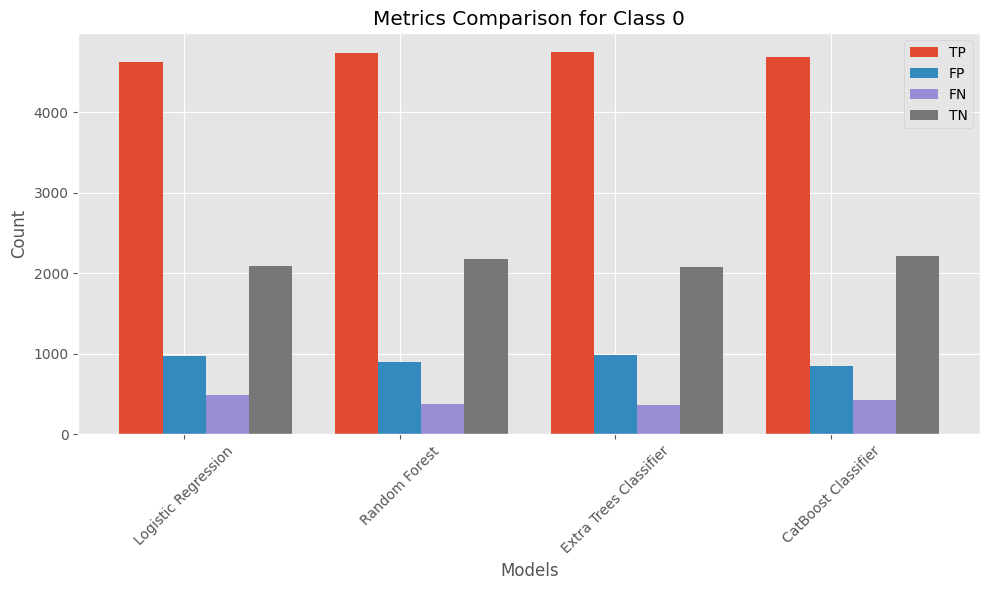

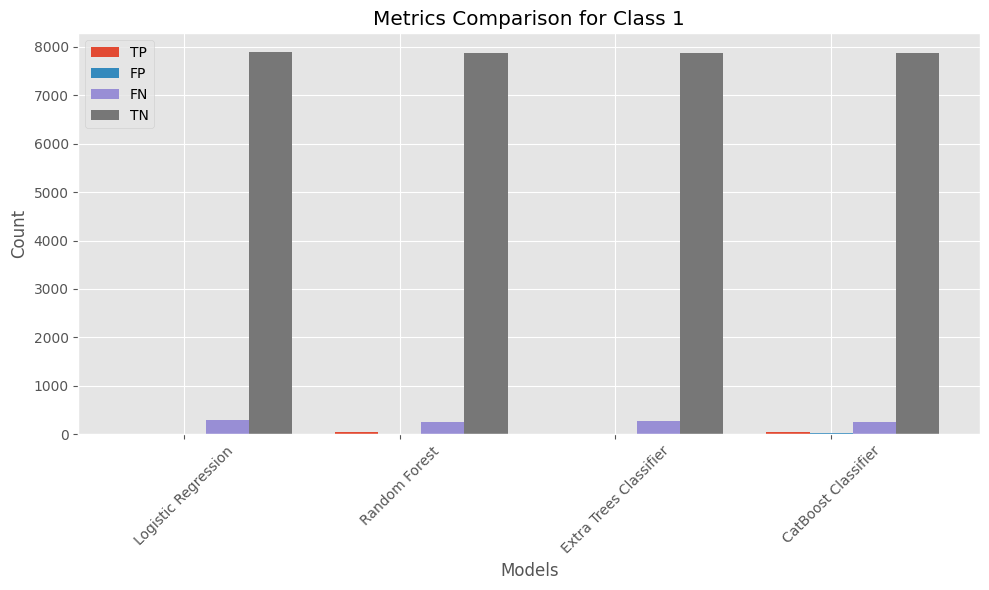

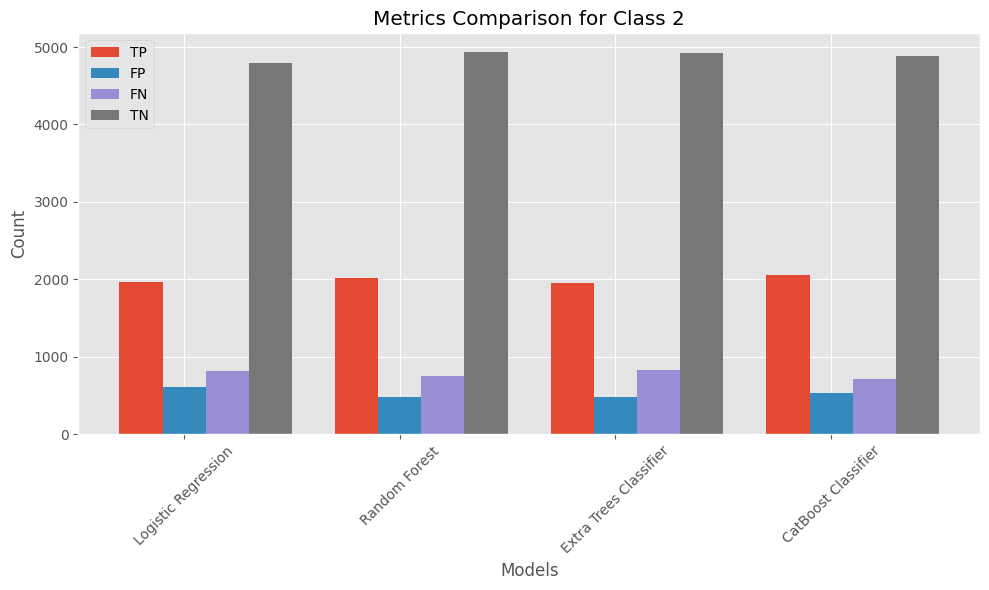

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for visualization
models = ['Logistic Regression', 'Random Forest', 'Extra Trees Classifier', 'CatBoost Classifier']
metrics = ['TP', 'FP', 'FN', 'TN']
class_0_data = [
    [4631, 976, 481, 2093],  # Logistic Regression
    [4740, 895, 372, 2174],  # Random Forest
    [4746, 988, 366, 2081],  # Extra Trees Classifier
    [4685, 849, 427, 2220],  # CatBoost Classifier
]
class_1_data = [
    [0, 0, 293, 7888],
    [42, 8, 251, 7880],
    [12, 4, 281, 7884],
    [47, 14, 246, 7874],
]
class_2_data = [
    [1964, 610, 812, 4795],
    [2022, 474, 754, 4931],
    [1951, 480, 825, 4925],
    [2061, 525, 715, 4880],
]

# Plotting the data for Class 0, 1, and 2
def plot_metrics(metrics_data, class_idx):
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    index = np.arange(len(models))

    for i, metric in enumerate(metrics):
        plt.bar(index + i * bar_width, [row[i] for row in metrics_data], bar_width, label=metric)

    plt.xlabel('Models')
    plt.ylabel('Count')
    plt.title(f'Metrics Comparison for Class {class_idx}')
    plt.xticks(index + bar_width, models, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for Class 0
plot_metrics(class_0_data, 0)

# Plot for Class 1
plot_metrics(class_1_data, 1)

# Plot for Class 2
plot_metrics(class_2_data, 2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Calculate metrics for each model
def get_metrics(Y_true, Y_preds):
    # Calculate F1-score, Precision, Recall for multiclass (average='weighted' or 'macro')
    f1 = f1_score(Y_true, Y_preds, average='weighted')   # Use 'weighted' or 'macro'
    precision = precision_score(Y_true, Y_preds, average='weighted')
    recall = recall_score(Y_true, Y_preds, average='weighted')

    return f1, precision, recall

# Store metrics for all models
metrics = {}

metrics['md1'] = get_metrics(Y, md1_preds)
metrics['md2'] = get_metrics(Y, md2_preds)
metrics['md3'] = get_metrics(Y, md3_preds)
metrics['md4'] = get_metrics(Y, md4_preds)
metrics['md5'] = get_metrics(Y, md5_preds)
metrics['md6'] = get_metrics(Y, md6_preds)
metrics['md7'] = get_metrics(Y, md7_preds)

# Prepare data for plotting
models = ['Logistic', 'RF', 'ET', 'HistGB', 'LGBM', 'XGB', 'CatBoost']
f1_scores = [metrics[m][0] for m in metrics]
precisions = [metrics[m][1] for m in metrics]
recalls = [metrics[m][2] for m in metrics]

# Plotting
barWidth = 0.25
fig, ax = plt.subplots(figsize=(12, 7))

# Set position of bar on X axis
br1 = np.arange(len(f1_scores))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Use the 'viridis' color palette
viridis = plt.cm.get_cmap('viridis', 3)
colors = viridis(np.linspace(0, 1, 3))

# Make the bar plot for each metric
ax.bar(br1, f1_scores, color=colors[0], width=barWidth, edgecolor='grey', label='F1-score')
ax.bar(br2, precisions, color=colors[1], width=barWidth, edgecolor='grey', label='Precision')
ax.bar(br3, recalls, color=colors[2], width=barWidth, edgecolor='grey', label='Recall')

# Customize the plot
ax.set_xlabel('Models', fontweight='bold', fontsize=15)
ax.set_ylabel('Scores', fontweight='bold', fontsize=15)
ax.set_title('Performance Comparison of All Models', fontweight='bold', fontsize=15)
ax.set_xticks([r + barWidth for r in range(len(f1_scores))])
ax.set_xticklabels(models)

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
def get_class_metrics(Y_true, Y_pred):
    # Generate a detailed classification report including Precision, Recall, F1-score for each class
    report = classification_report(Y_true, Y_pred, output_dict=True)
    return report

# Calculate metrics for each model
metrics = {}
metrics['md1'] = get_class_metrics(Y_test_all, md1_all_preds)
metrics['md2'] = get_class_metrics(Y_test_all, md2_all_preds)
metrics['md3'] = get_class_metrics(Y_test_all, md3_all_preds)
metrics['md4'] = get_class_metrics(Y_test_all, md4_all_preds)
metrics['md5'] = get_class_metrics(Y_test_all, md5_all_preds)
metrics['md6'] = get_class_metrics(Y_test_all, md6_all_preds)
metrics['md7'] = get_class_metrics(Y_test_all, md7_all_preds)

# Displaying class-specific metrics for each model
for model_name, metric in metrics.items():
    print(f"\nClass-Specific Metrics for {model_name}:")
    for class_label, class_metrics in metric.items():
        if class_label.isdigit():  # Filtering out the 'accuracy' and 'macro avg' from the report
            print(f"\nClass {class_label}:")
            print(f"  Precision: {class_metrics['precision']:.3f}")
            print(f"  Recall:    {class_metrics['recall']:.3f}")
            print(f"  F1-score:  {class_metrics['f1-score']:.3f}")

In [ ]:
from sklearn.metrics import classification_report

# Function to calculate class-specific metrics for each model
def get_class_metrics(Y_true, Y_pred):
    # Generate a detailed classification report including Precision, Recall, F1-score for each class
    report = classification_report(Y_true, Y_pred, output_dict=True)
    return report

# Calculate metrics for each model
metrics = {}
metrics['md1'] = get_class_metrics(Y, md1_preds)
metrics['md2'] = get_class_metrics(Y, md2_preds)
metrics['md3'] = get_class_metrics(Y, md3_preds)
metrics['md4'] = get_class_metrics(Y, md4_preds)
metrics['md5'] = get_class_metrics(Y, md5_preds)
metrics['md6'] = get_class_metrics(Y, md6_preds)
metrics['md7'] = get_class_metrics(Y, md7_preds)

# Displaying class-specific metrics for each model
for model_name, metric in metrics.items():
    print(f"\nClass-Specific Metrics for {model_name}:")
    for class_label, class_metrics in metric.items():
        if class_label.isdigit():  # Filtering out the 'accuracy' and 'macro avg' from the report
            print(f"\nClass {class_label}:")
            print(f"  Precision: {class_metrics['precision']:.3f}")
            print(f"  Recall:    {class_metrics['recall']:.3f}")
            print(f"  F1-score:  {class_metrics['f1-score']:.3f}")



Class-Specific Metrics for md1:

Class 0:
  Precision: 0.827
  Recall:    0.907
  F1-score:  0.865

Class 1:
  Precision: 0.000
  Recall:    0.000
  F1-score:  0.000

Class 2:
  Precision: 0.765
  Recall:    0.709
  F1-score:  0.736

Class-Specific Metrics for md2:

Class 0:
  Precision: 0.959
  Recall:    0.997
  F1-score:  0.978

Class 1:
  Precision: 0.992
  Recall:    0.881
  F1-score:  0.933

Class 2:
  Precision: 0.995
  Recall:    0.934
  F1-score:  0.963

Class-Specific Metrics for md3:

Class 0:
  Precision: 0.910
  Recall:    0.993
  F1-score:  0.950

Class 1:
  Precision: 1.000
  Recall:    0.491
  F1-score:  0.659

Class 2:
  Precision: 0.971
  Recall:    0.859
  F1-score:  0.912

Class-Specific Metrics for md4:

Class 0:
  Precision: 0.882
  Recall:    0.942
  F1-score:  0.911

Class 1:
  Precision: 0.866
  Recall:    0.396
  F1-score:  0.543

Class 2:
  Precision: 0.861
  Recall:    0.802
  F1-score:  0.831

Class-Specific Metrics for md5:

Class 0:
  Precision: 0.921
  

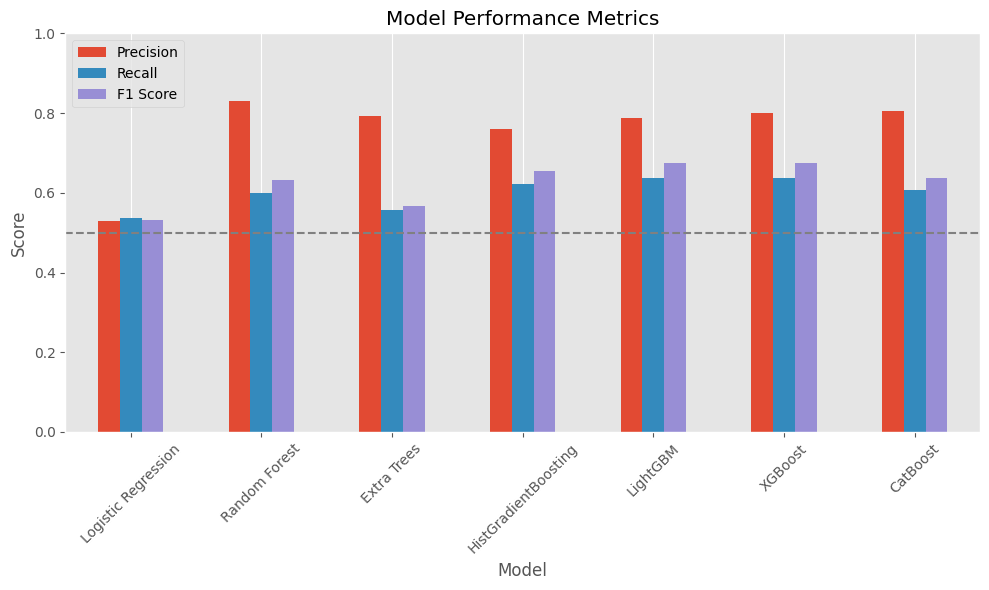

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score

# Initialize lists to store scores
model_names = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over the models and calculate scores
for model_name, y_pred_proba in models_probs.items():
    y_pred_class = np.argmax(y_pred_proba, axis=1)

    # Calculate metrics
    precision = precision_score(Y_test_all, y_pred_class, average='macro', zero_division=0)
    recall = recall_score(Y_test_all, y_pred_class, average='macro', zero_division=0)
    f1 = f1_score(Y_test_all, y_pred_class, average='macro', zero_division=0)

    # Append to lists
    model_names.append(model_name)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Set the model names as index
metrics_df.set_index('Model', inplace=True)

# Plotting the metrics as a bar chart
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.axhline(0.5, color='grey', linestyle='--')  # Optional: line at y=0.5 for reference
plt.grid(axis='y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


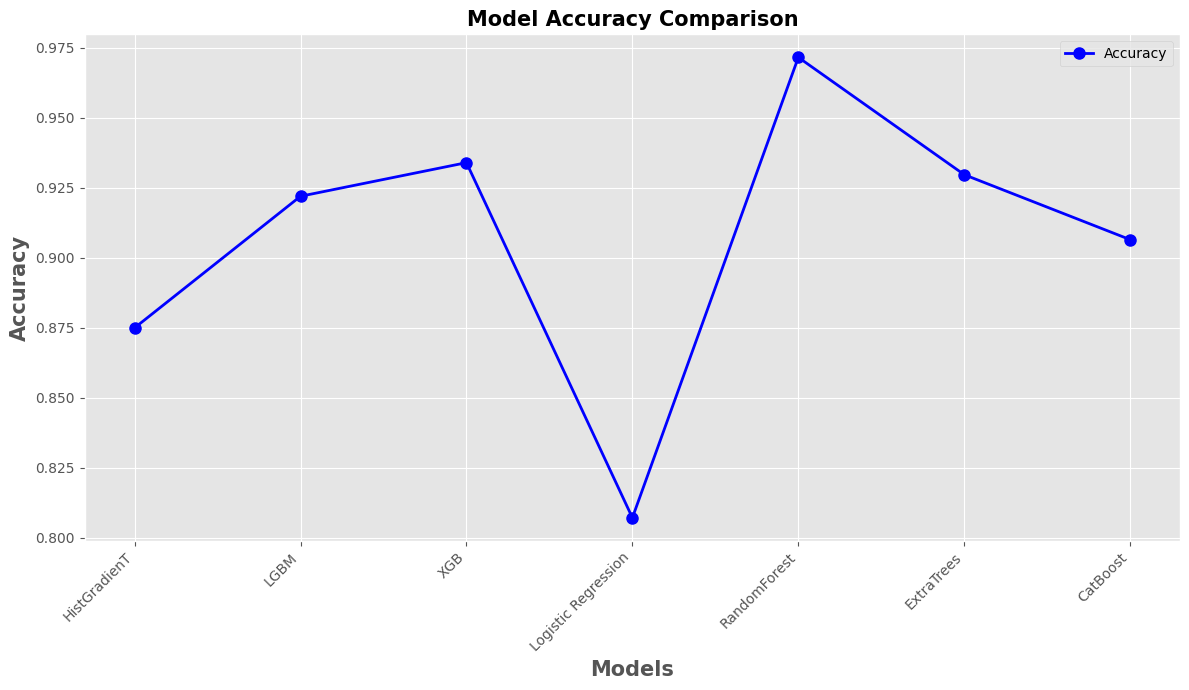

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and accuracy values
model_names = ['HistGradienT', 'LGBM', 'XGB',
               'Logistic Regression', 'RandomForest', 'ExtraTrees', 'CatBoost']

accuracies = [0.875, 0.922, 0.934, 0.8072, 0.9716, 0.9297, 0.9065]

# Plotting accuracy as a line chart
plt.figure(figsize=(12, 7))
plt.plot(model_names, accuracies, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Accuracy')

# Customize the chart
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Accuracy', fontweight='bold', fontsize=15)
plt.title('Model Accuracy Comparison', fontweight='bold', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate the model names for better readability
# Add grid and a legend
plt.grid(True)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()
